# Chapter 5 - Exercises

## 1.

y = 1.759193148105248*x + 4.69359654825405


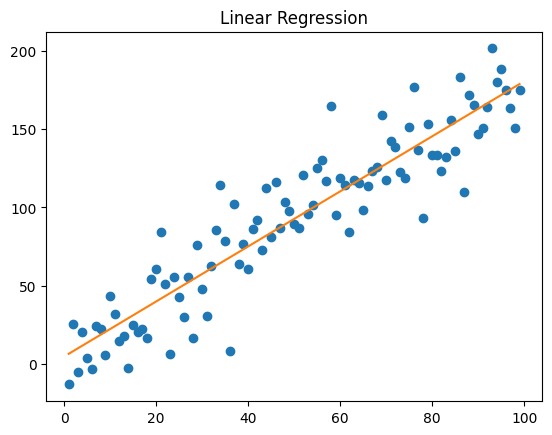

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("chapter_05.csv")
data_x = df.to_numpy()[:, 0:1]
data_y = df.to_numpy()[:, 1]

reg = LinearRegression().fit(data_x, data_y)

m = reg.coef_.flatten()[0]
b = reg.intercept_.flatten()[0]

print(f"y = {m}*x + {b}")

plt.subplot()
plt.plot(data_x, data_y, 'o')
plt.plot(data_x, m*data_x+b)
plt.title("Linear Regression")
plt.show()

## 2.

In [2]:
import math

r = math.sqrt(reg.score(data_x, data_y))
print(f"Correlation coefficient: r = {r}")

df.corr(method='pearson')

Correlation coefficient: r = 0.9242100628677159


,x,y
x,1.00000,0.92421
y,0.92421,1.00000


Lower: -1.9844674544266925 | Upper: 1.984467454426692


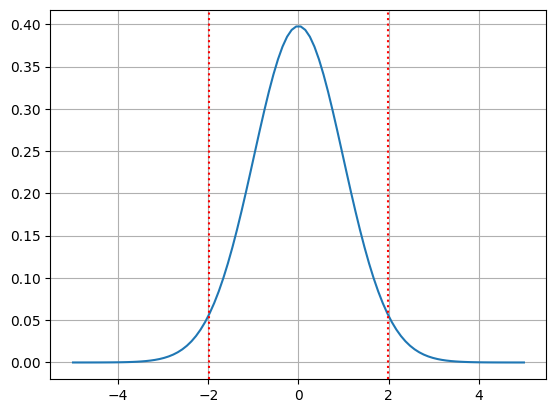

Test value: t = 23.835515323677306
With >= 95% confidence the correlation is not occuring by chance


In [3]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

n = len(data_x)

plt.subplot()
plt.grid(True, which="both")

x = np.linspace(-5, 5, 100)
plt.plot(x, [stats.t.pdf(i, n-1) for i in x])

plt.axvline(x = stats.t.ppf(0.05/2, n-1), color = 'r', linestyle = ':')
plt.axvline(x = stats.t.ppf(1-0.05/2, n-1), color = 'r', linestyle = ':')

lower = stats.t.ppf(0.05/2, n-1)
upper = stats.t.ppf(1-0.05/2, n-1)

print(f"Lower: {lower} | Upper: {upper}")

plt.show()

if r != abs(1) and n != 2:
    t = r / math.sqrt( (1 - r**2) / (n - 2))

    print(f"Test value: t = {t}")

    print("With >= 95% confidence ", end="")
    if t < lower or t > upper:
        print("the correlation is not occuring by chance")
    else:
        print("the correlation is occuring by chance")

## 3.

Note: Not sure about `t1`, see [Possible Typo in Code Example and Exercise Solution](https://github.com/thomasnield/oreilly_essential_math_for_data_science_book/issues/1).

In [4]:
predicted_x = 50
predicted_y = m*predicted_x + b

print(f"m*{predicted_x} + b = {predicted_y}")

stderr = math.sqrt((sum((data_y[i] - (m*data_x[i][0] +b))**2 for i in range(len(data_x)))) / (n-2))
print(f"standard error: {stderr}")

mean = sum(data_x[i][0] for i in range(len(data_x))) / n
print(f"mean: {mean}")

upper = stats.t.ppf(1-0.05/2, n-2)

t1 = n*(predicted_x + mean)**2
t2 = n*(sum(data_x[i][0]**2 for i in range(len(data_x))))
t3 = sum(data_x[i][0] for i in range(len(data_x)))**2
moe = upper * stderr * math.sqrt( 1 + 1/n + t1/(t2-t3) )
print(f"95% range: [{predicted_y-moe}, {predicted_y+moe}]")


m*50 + b = 92.65325395351645
standard error: 20.985967266937596
mean: 50.0
95% range: [48.30315003286832, 137.00335787416458]


## 4.

y = 1.8185821033684366*x + -1.7619761826108515


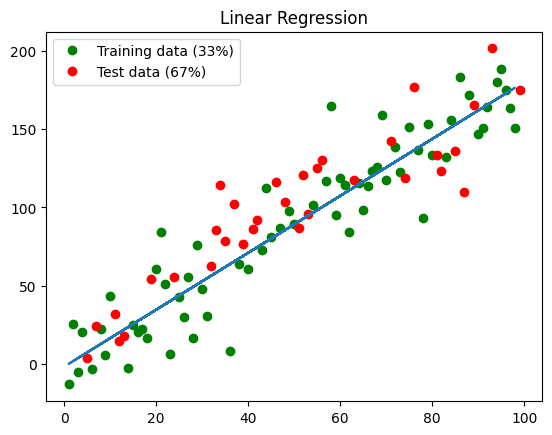

Test data correlation coefficient: r = 0.8765211227098736


In [5]:
from sklearn.model_selection import train_test_split

tt_ratio = 1/3
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=tt_ratio)

reg = LinearRegression().fit(train_x, train_y)

m = reg.coef_.flatten()[0]
b = reg.intercept_.flatten()[0]

print(f"y = {m}*x + {b}")

plt.subplot()
plt.plot(train_x, train_y, 'o', color='g', label=f'Training data ({tt_ratio*100:.0f}%)')
plt.plot(test_x, test_y, 'o', color='r', label=f'Test data ({(1-tt_ratio)*100:.0f}%)')
plt.plot(train_x, m*train_x+b)
plt.title("Linear Regression")
plt.legend()

plt.show()

test_r = math.sqrt(reg.score(test_x, test_y))
print(f"Test data correlation coefficient: r = {test_r}")